# Mistral OCR API
* https://docs.mistral.ai/capabilities/document/
* https://docs.mistral.ai/api/#tag/ocr

In [14]:
import base64
import os
from mistralai import Mistral

from config import settings

In [2]:
client = Mistral(api_key=settings.mistral_api_key)

In [3]:
sample_id = "allganize-finance-2019-증시콘서트-샘플"
sample_fname = f"../samples/{sample_id}.pdf"
uploaded_pdf = client.files.upload(
    file={
        "file_name": f"{sample_id}.pdf",
        "content": open(sample_fname, "rb"),
    },
    purpose="ocr"
)  

In [4]:
client.files.retrieve(file_id=uploaded_pdf.id)

RetrieveFileOut(id='45ac7655-80b4-4625-a790-5fa443044690', object='file', size_bytes=1969343, created_at=1741580625, filename='allganize-finance-2019-증시콘서트-샘플.pdf', purpose='ocr', sample_type='ocr_input', source='upload', deleted=False, num_lines=None)

In [5]:
## Get Signed Url
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

In [ ]:
# 6.3sec
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    },
    include_image_base64=True,
    image_min_size=100
)

In [8]:
ocr_response.model, ocr_response.usage_info

('mistral-ocr-2503-completion',
 OCRUsageInfo(pages_processed=10, doc_size_bytes=1969343))

index=0 markdown='# 증권사 리서치센터장, 자산운용사 대표와 함께하는 제1회 증시 콘서트 \n\n## 2019 하반기 증시 대전망\n\n| 일 시 | 2019. 7. 2 (화) 14:30\n| 장 소 | 금융투자협회 3층 불스홀' images=[] dimensions=OCRPageDimensions(dpi=200, height=2333, width=1648)
index=1 markdown='# 2019년 「제1회 종시 콘서트」개요 \n\n진행순서\n\n| 구분 | 시 간 |  | 내 용 |\n| :--: | :--: | :--: | :--: |\n| 1부 | 14:30 14:40 | $10^{\\prime}$ | - 인사말 (권용원 금융투자협회 회장) |\n|  | 14:40 15:40 | $60^{\\prime}$ | - 리서치센터장(4인)의 하반기 전망 |\n| - | 15:40 15:45 | $5^{\\prime}$ | - Break |\n| 2부 | 15:45 16:35 | $50^{\\prime}$ | - 종합토론 <br> (센터장 4인, 운용사 2인, 연구원 1인) |\n\n발표자 및 토론자 명단\n\n| 소속 | 성 명 | 소속 | 성 명 |\n| :--: | :--: | :--: | :--: |\n| 삼성증권 | 오현석 리서치센터장 | 미래에셋 <br> 자산운용 | 이준용 사장 <br> (글로벌운용총괄) |\n| 하나금융투자 | 조용준 리서치센터장 | 한국투자 <br> 밸류자산운용 | 이채원 대표 |\n| SK증권 | 최석원 리서치센터장 | 자본시장 <br> 연구원 | 강현주 실장 <br> (거시금융실) |\n| NH투자증권 | 이창목 리서치센터장 |  |  |\n\n※ 종합토론 사회 : 자본시장연구원 납길남 동향분석실장' images=[] dimensions=OCRPageDimensions(dpi=200, height=2339, width=1654)
index=2 markdown='증권사 리서치센터장, 자산운용사 대표와 함께하는 
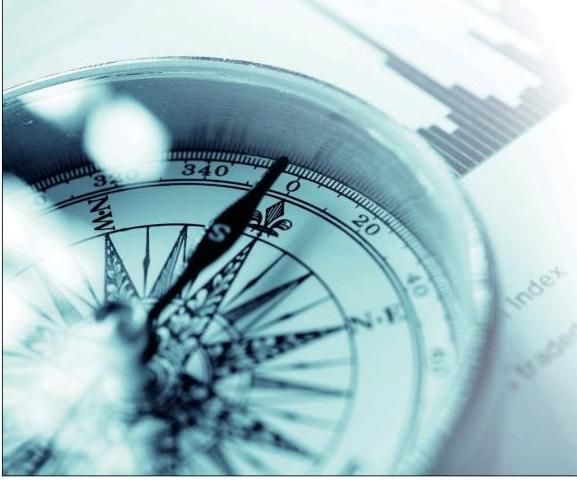
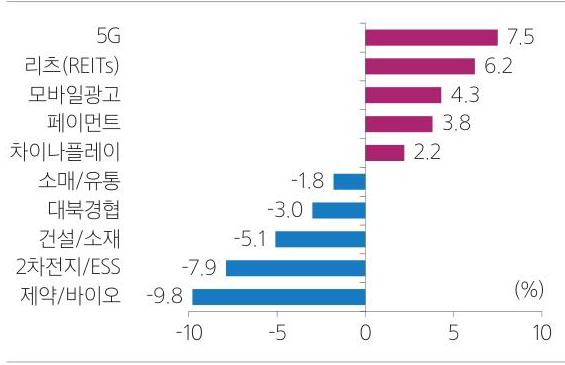
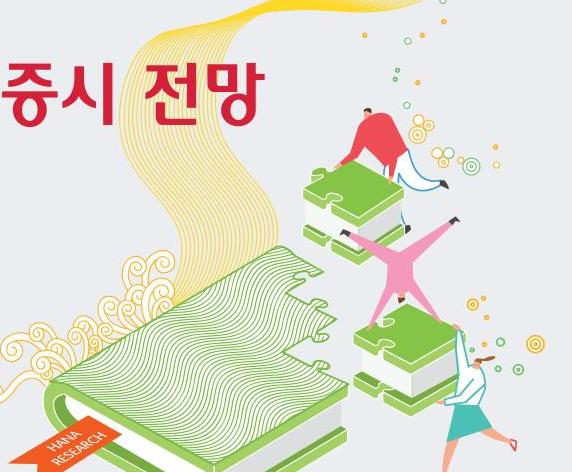
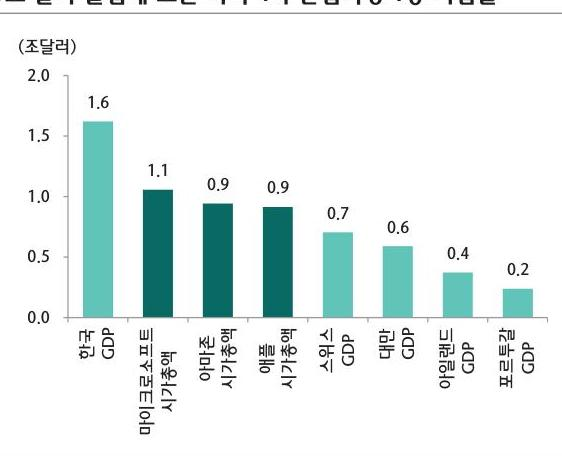
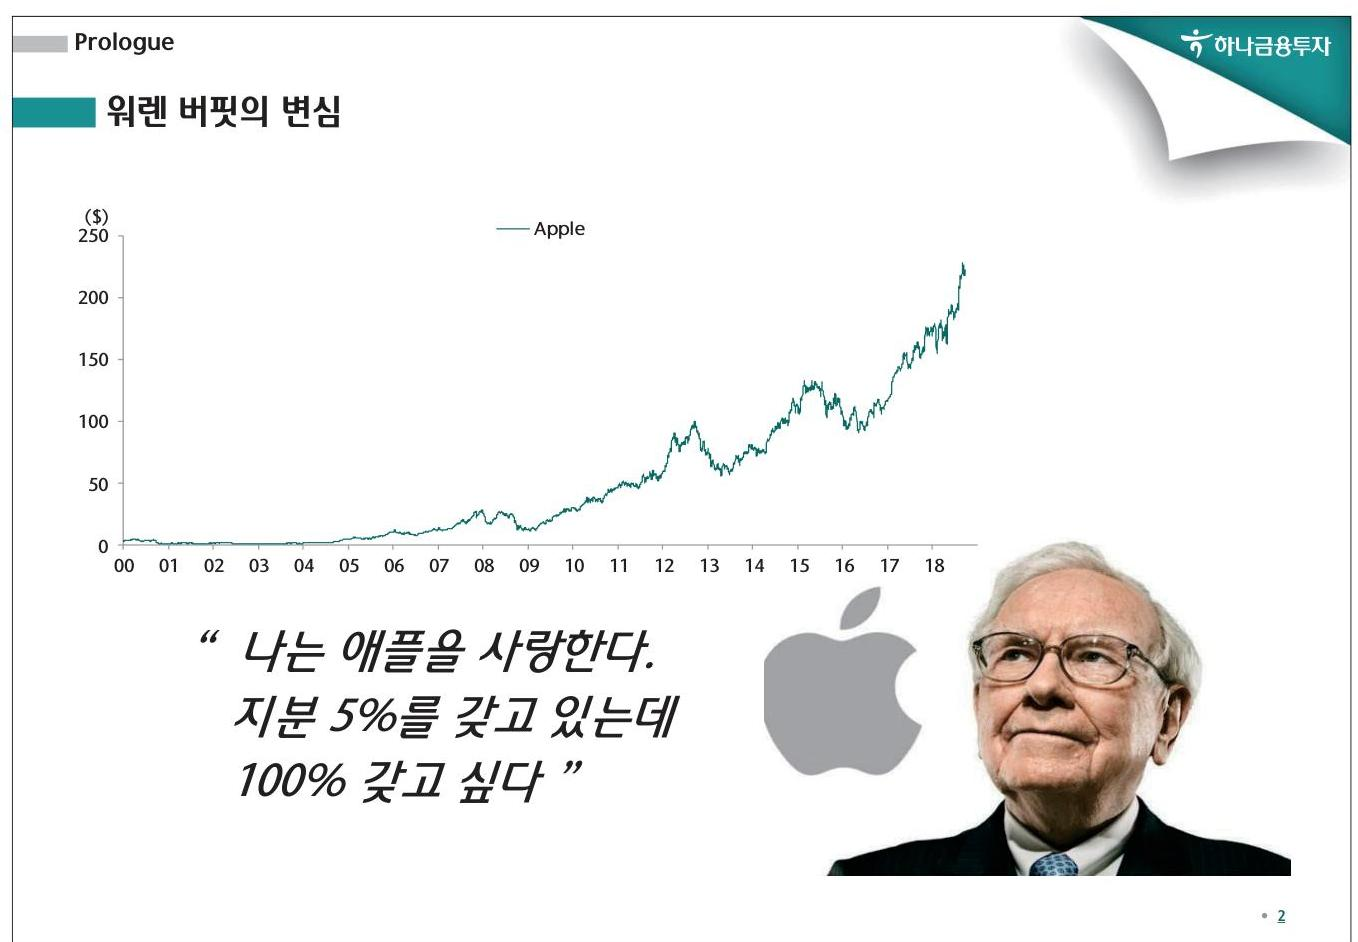
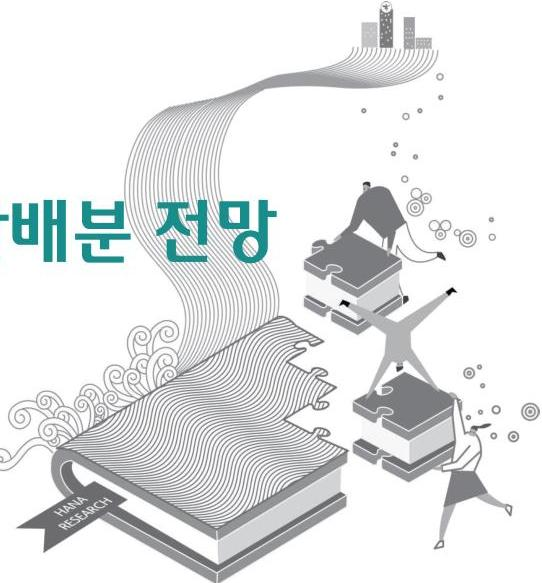
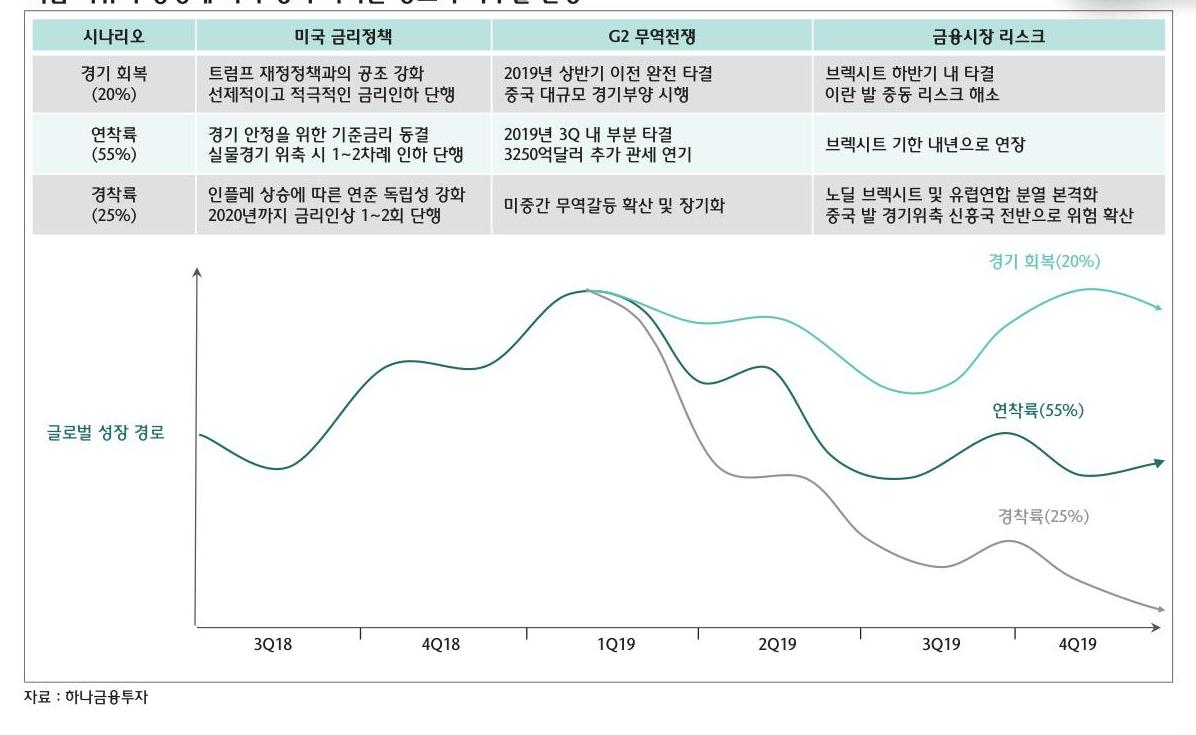
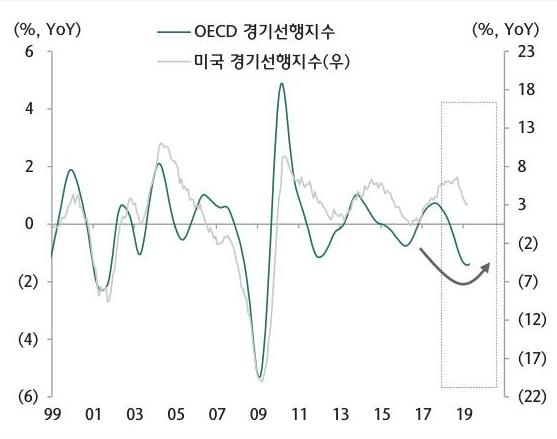
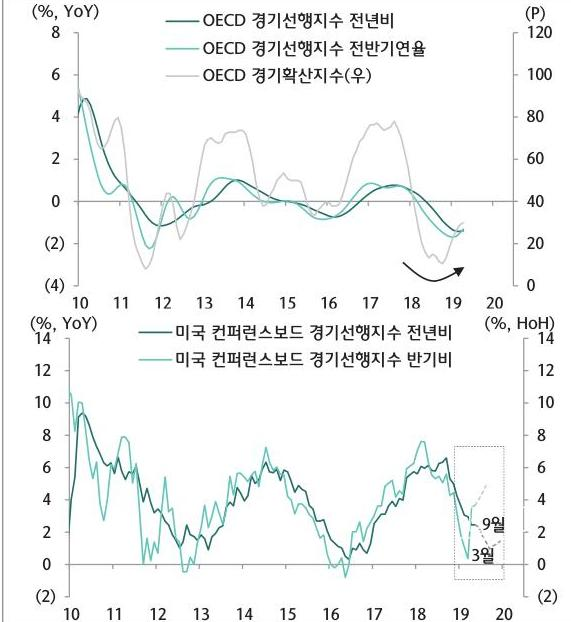
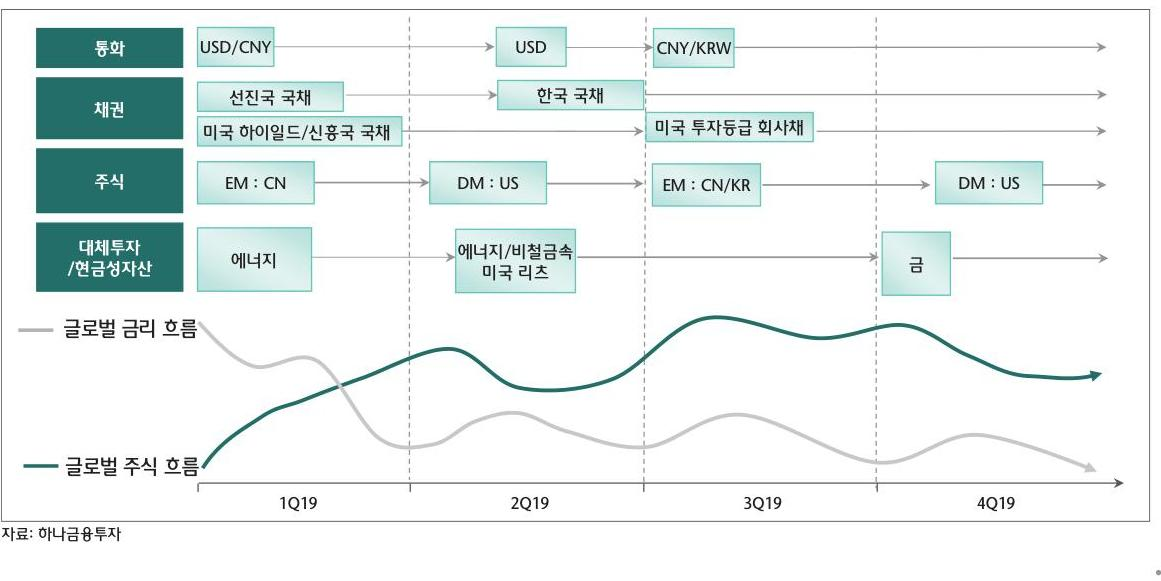
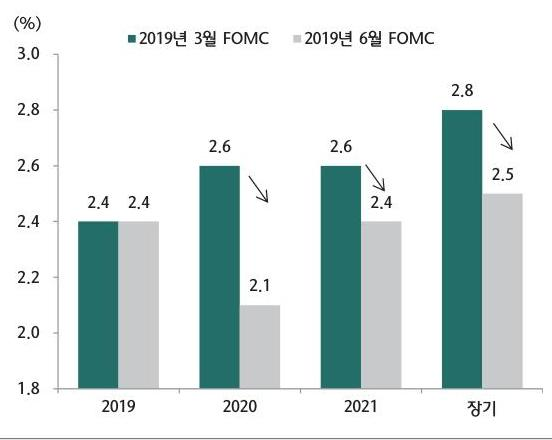
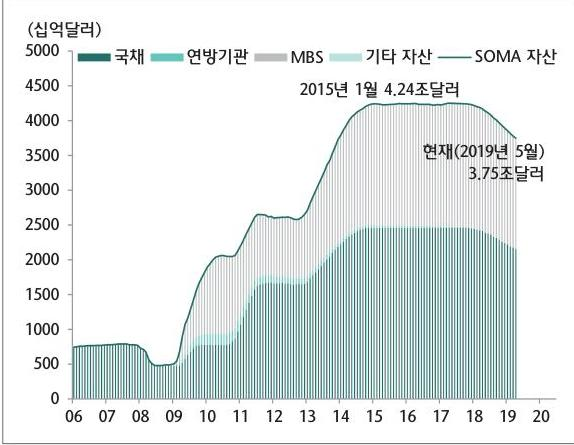

In [17]:
for page in ocr_response.pages:
    print(page)
    page_num = page.index+1
    markdown = page.markdown
    
    with open(f"results/mistral/{sample_id}-{page_num}.md", "w") as f:
        f.write(markdown)
        
    for image in page.images:
        image_fname = image.id
        base64_string = image.image_base64
        if "," in base64_string:
            base64_string = base64_string.split(",")[1]
        data = base64.b64decode(base64_string)
    
        # data = base64.b64decode(image.image_base64)
        with open(f"results/mistral/{image_fname}", "wb") as f:
            f.write(data)
        